In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import pylab as pl
from sklearn.metrics import confusion_matrix,accuracy_score

## load data

In [2]:
# load training data
filename = []
label = []
with open('train.txt', 'r') as f:
    for line in f.readlines():
        s = line.split(' ')
        filename.append(s[0])
        label.append(int(s[1]))
print(len(label))

63325


In [3]:
dataset_train = []
for i in range(len(filename)):
    dataset_train.append((filename[i],label[i]))

In [4]:
# load testing data
filename_test = []
label_test = []
with open('test.txt', 'r') as f:
    for line in f.readlines():
        s = line.split(' ')
        filename_test.append(s[0])
        label_test.append(int(s[1]))
print(len(label_test))

450


In [5]:
dataset_test = []
for i in range(len(filename_test)):
    dataset_test.append((filename_test[i],label_test[i]))

In [6]:
# load validation data
filename_val = []
label_val = []
with open('val.txt', 'r') as f:
    for line in f.readlines():
        s = line.split(' ')
        filename_val.append(s[0])
        label_val.append(int(s[1]))
print(len(label_val))

450


In [7]:
dataset_val = []
for i in range(len(filename_val)):
    dataset_val.append((filename_val[i],label_val[i]))

In [8]:
image_paths_train, y_train = zip(*dataset_train)
image_paths_test, y_test = zip(*dataset_test)
image_paths_val, y_val = zip(*dataset_val)

# Feature Extraction using ORB

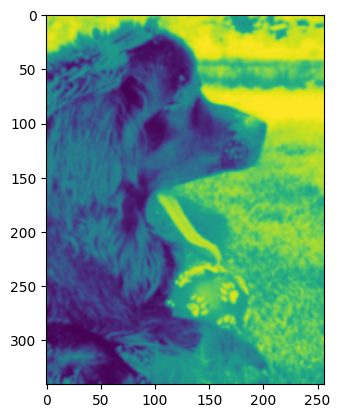

In [9]:
# 初始化ORB特征检测器对象 (chatgpt)
orb = cv2.ORB_create(nfeatures=500, scaleFactor=1.2, nlevels=8, edgeThreshold=15)
im=cv2.imread(image_paths_train[1])
# 轉為灰度影像
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# 使用直方圖均衡化增加影像對比度
equalized = cv2.equalizeHist(gray)
# 高斯模糊處理
blur = cv2.GaussianBlur(equalized, (5, 5), 0)
plt.imshow(blur)

## Function for plotting keypoints

In [10]:
def draw_keypoints(vis, keypoints, color = (0, 255, 255)):
    for kp in keypoints:
            x, y = kp.pt
            plt.imshow(cv2.circle(vis, (int(x), int(y)), 2, color))

## Plotting the keypoints

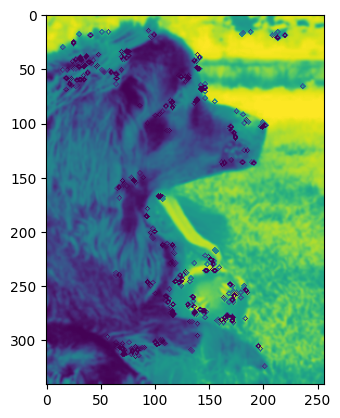

In [11]:
kp, des = orb.detectAndCompute(blur, None)
img=draw_keypoints(blur,kp)

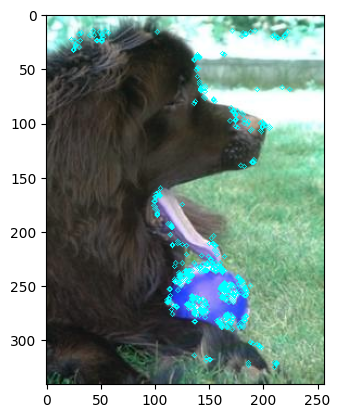

In [12]:
kp, des = orb.detectAndCompute(im, None)
img=draw_keypoints(im,kp)

(-0.5, 340.5, 255.5, -0.5)

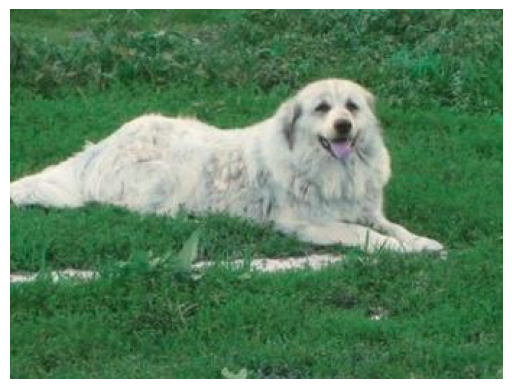

In [13]:
# 讀取影像
img = cv2.imread(image_paths_train[2500])
plt.imshow(img)
plt.axis('off')

(-0.5, 340.5, 255.5, -0.5)

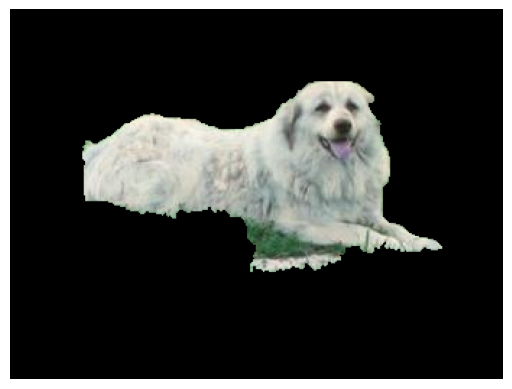

In [14]:
# 讀取影像
img = cv2.imread(image_paths_train[2500])

# 建立掩膜和預設的矩形區域
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)

# 使用GrabCut方法進行影像分割
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

# 將掩膜中屬於前景的像素設為1，其餘設為0
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

# 進行位元運算，得到分割後的影像
result = img*mask2[:,:,np.newaxis]

# 顯示分割後的影像
plt.imshow(result)
plt.axis('off')

(-0.5, 340.5, 255.5, -0.5)

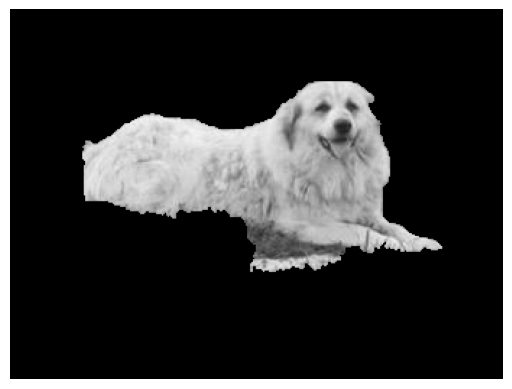

In [15]:
# 轉為灰度影像
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

(-0.5, 340.5, 255.5, -0.5)

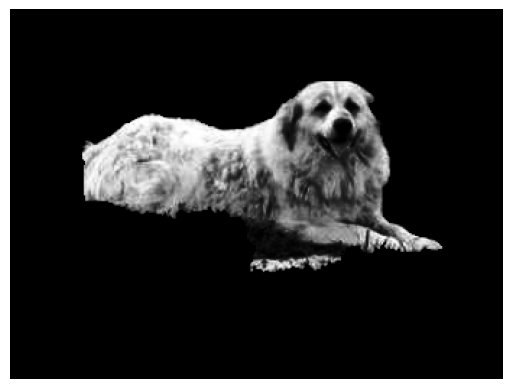

In [16]:
# 使用直方圖均衡化增加影像對比度
equalized = cv2.equalizeHist(gray)
plt.imshow(equalized, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

(-0.5, 340.5, 255.5, -0.5)

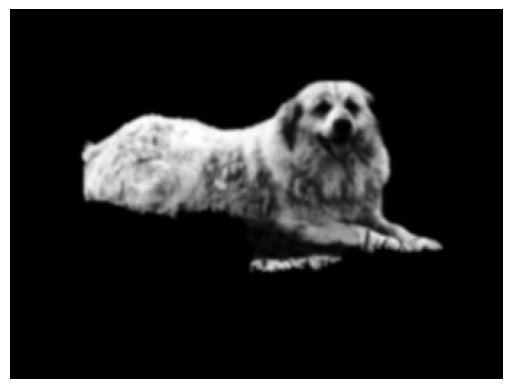

In [17]:
# 高斯模糊處理
blur = cv2.GaussianBlur(equalized, (5, 5), 0)
plt.imshow(blur, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

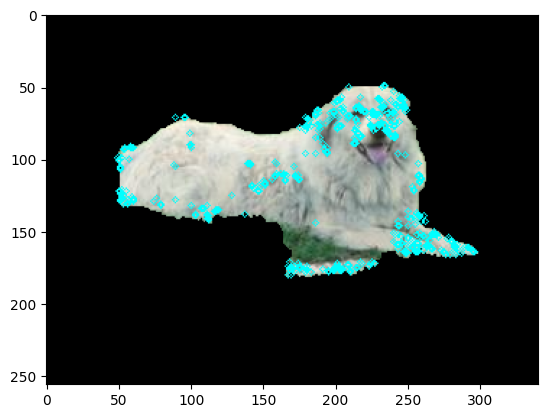

In [18]:
# 初始化ORB特征检测器对象 (chatgpt)
orb = cv2.ORB_create(nfeatures=500, scaleFactor=1.2, nlevels=8, edgeThreshold=15)

kp, des = orb.detectAndCompute(blur, None)
img=draw_keypoints(result,kp)

# Appending descriptors of the training images in list

In [21]:
des_list=[]
nonelist=[]
num=0
for image_pat in image_paths_train:
    
    img=cv2.imread(image_pat)
    
    # 建立掩膜和預設的矩形區域
    mask = np.zeros(img.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    rect = (50,50,450,290)
    
    # 使用GrabCut方法進行影像分割
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

    # 將掩膜中屬於前景的像素設為1，其餘設為0
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

    # 進行位元運算，得到分割後的影像
    result = img*mask2[:,:,np.newaxis]
    
    # 轉為灰度影像
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # 使用直方圖均衡化增加影像對比度
    equalized = cv2.equalizeHist(gray)
    # 高斯模糊處理
    blur = cv2.GaussianBlur(equalized, (5, 5), 0)

    keypoints,descriptor = orb.detectAndCompute(blur, None)
    
    if descriptor is not None:
        des_list.append((image_pat,descriptor))
    else:
        nonelist.append((image_pat,num))
    num=num+1

63325


IndexError: list index out of range

In [22]:
print(len(des_list))
print(len(nonelist))

63325
0


In [23]:
if len(nonelist)>0:
    tmp=nonelist[0][1]
    y_train = list(y_train)  # 將 tuple 型別的 list 轉換為 list 型別
    y_train.pop(tmp)  # 刪除其中一項

In [24]:
descriptors=des_list[0][1]
descriptors = np.concatenate([descriptor for _, descriptor in des_list[1:]], axis=0)
descriptors_float=np.array(descriptors).astype(float)

# Performing K Means clustering on Descriptors

In [25]:
from scipy.cluster.vq import kmeans,vq
from sklearn.cluster import MiniBatchKMeans

In [30]:
from multiprocessing import Pool
from sklearn.cluster import MiniBatchKMeans

k = 500
n_jobs = 10  # 設置使用CPU核心數
batch_size = 1024
max_iter = 1200

def cluster(descriptors_float):
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, max_iter=max_iter)
    kmeans.fit(descriptors_float)
    return kmeans

if __name__ == '__main__':
    pool = Pool(n_jobs)  # 創建進程池
    results = pool.map(cluster, [descriptors_float] * n_jobs)  # 將數據分配給多個進程進行聚類
    pool.close()
    pool.join()

    # 合併多個進程的聚類結果
    kmeans = results[0]
    for i in range(1, n_jobs):
        kmeans.partial_fit(results[i].cluster_centers_)

    # 最後的聚類結果
    labels = kmeans.predict(descriptors_float)


/home/tailab_paipei/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tailab_paipei/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tailab_paipei/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tailab_paipei/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tailab

KeyboardInterrupt: 

Process ForkPoolWorker-59:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/m

In [28]:
# chatgpt 
k = 500
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=1024, max_iter=1200).fit(descriptors_float)
voc = kmeans.cluster_centers_
variance = kmeans.inertia_

/home/tailab_paipei/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

#### Creating histogram of training image

In [17]:
im_features=np.zeros((len(des_list),k),"float32")
for i in range(len(des_list)):
    words, _ = vq(des_list[i][1], voc)

    # 使用bincount函数计算单个图像中每个单词出现的次数，并将结果存储到im_features数组中
    im_features[i] = np.bincount(words, minlength=k)

### Applying standardisation on training feature

In [18]:
from sklearn.preprocessing import StandardScaler
stdslr=StandardScaler().fit(im_features)
im_features=stdslr.transform(im_features)

### Create testing image feature 

In [19]:
des_list_test=[]
for image_pat in image_paths_test:
    im=cv2.imread(image_pat)
    keypoints,descriptor= orb.detectAndCompute(im, None)
    des_list_test.append((image_pat,descriptor))

In [20]:
im_features_test=np.zeros((len(des_list_test),k),"float32")
for i in range(len(des_list_test)):
    words, _ = vq(des_list_test[i][1], voc)

    # 使用bincount函数计算单个图像中每个单词出现的次数，并将结果存储到im_features数组中
    im_features_test[i] = np.bincount(words, minlength=k)

### Create validation image feature 

In [21]:
des_list_val=[]
for image_pat in image_paths_val:
    im=cv2.imread(image_pat)
    keypoints,descriptor= orb.detectAndCompute(im, None)
    des_list_val.append((image_pat,descriptor))

In [22]:
im_features_val=np.zeros((len(des_list_val),k),"float32")
for i in range(len(des_list_val)):
    words, _ = vq(des_list_val[i][1], voc)

    # 使用bincount函数计算单个图像中每个单词出现的次数，并将结果存储到im_features数组中
    im_features_val[i] = np.bincount(words, minlength=k)